In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "d:\programfileselfmade\anaconda1402\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "d:\programfileselfmade\anaconda1402\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "d:\programfileselfmade\anaconda1402\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "d:\programfileselfmade\anaconda1402\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
 

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "d:\programfileselfmade\anaconda1402\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "d:\programfileselfmade\anaconda1402\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "d:\programfileselfmade\anaconda1402\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "d:\programfileselfmade\anaconda1402\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
 

AttributeError: _ARRAY_API not found

In [2]:
# Load the dataset
file_path = 'marketing_campaign_dataset.csv'
df = pd.read_csv(file_path)

In [3]:
# Data Cleaning
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# Remove '$' from Acquisition_Cost and convert to numeric
df['Acquisition_Cost'] = df['Acquisition_Cost'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [5]:
# Descriptive Statistics
print("Basic Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       200000 non-null  int64         
 1   Company           200000 non-null  object        
 2   Campaign_Type     200000 non-null  object        
 3   Target_Audience   200000 non-null  object        
 4   Duration          200000 non-null  object        
 5   Channel_Used      200000 non-null  object        
 6   Conversion_Rate   200000 non-null  float64       
 7   Acquisition_Cost  200000 non-null  float64       
 8   ROI               200000 non-null  float64       
 9   Location          200000 non-null  object        
 10  Language          200000 non-null  object        
 11  Clicks            200000 non-null  int64         
 12  Impressions       200000 non-null  int64         
 13  Engagement_Score  200000 non-null  int64

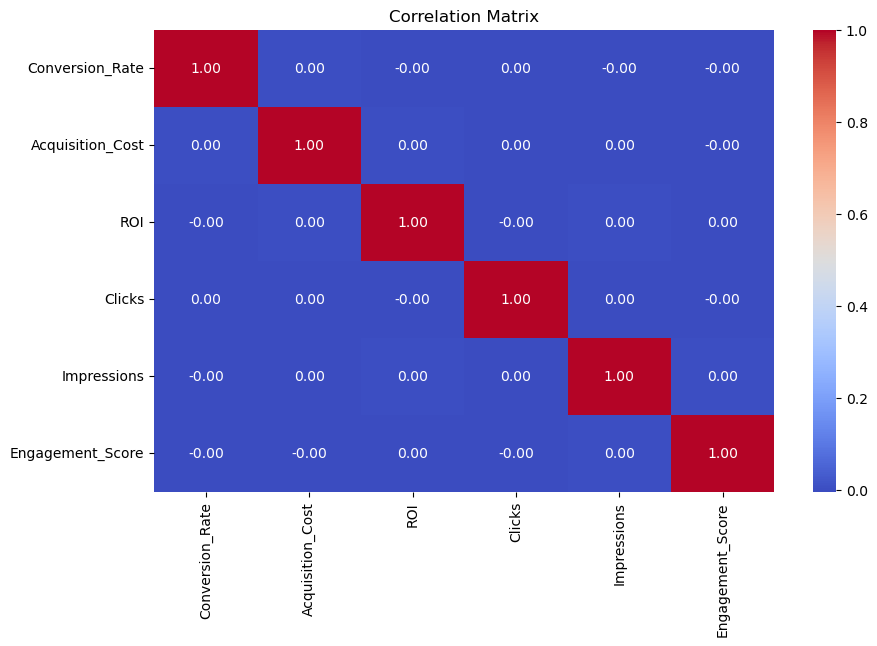

In [8]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])
numeric_df = numeric_df.drop(columns=['Campaign_ID'])
# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

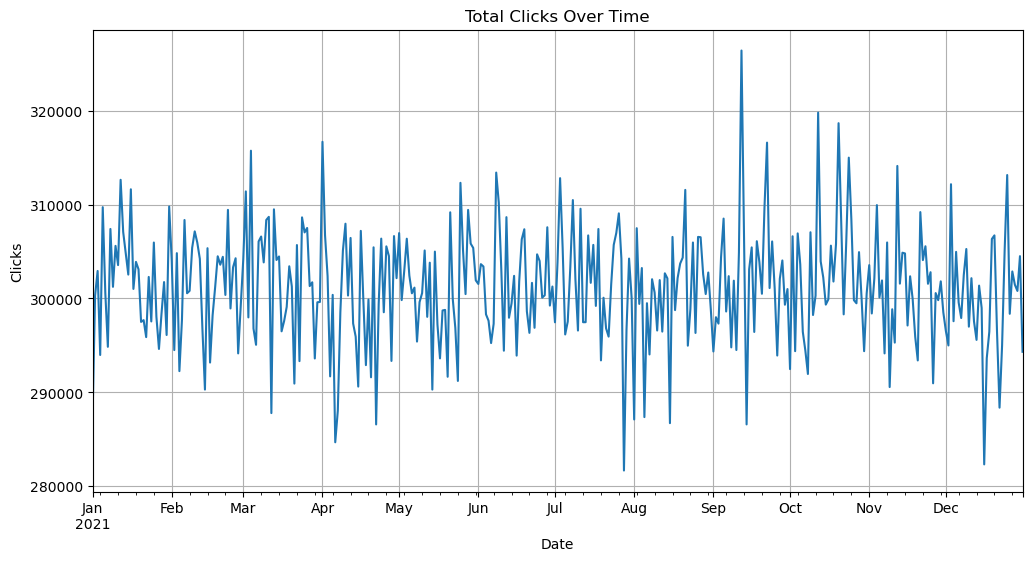

In [9]:
# Time Series Analysis
plt.figure(figsize=(12, 6))
df.groupby('Date')['Clicks'].sum().plot()
plt.title('Total Clicks Over Time')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.grid()
plt.show()

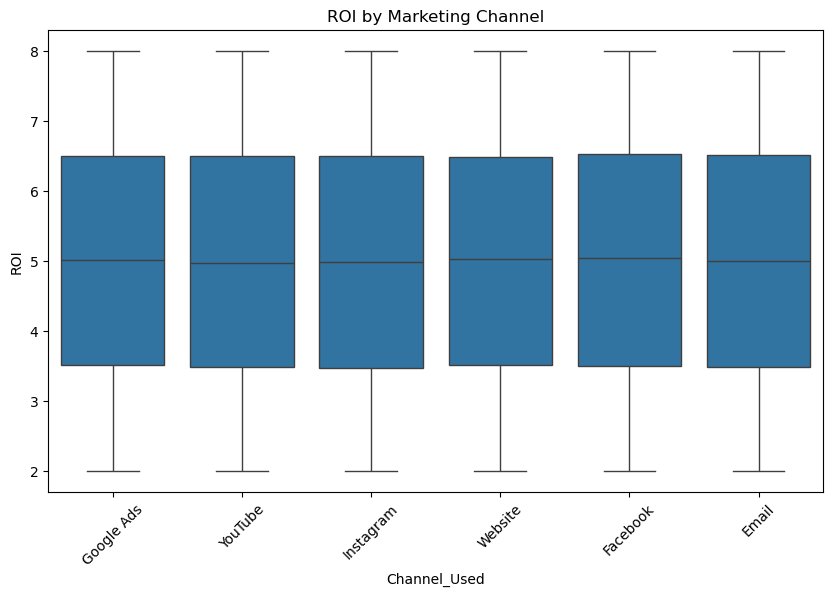

In [10]:
# Campaign Performance by Channel
plt.figure(figsize=(10, 6))
sns.boxplot(x='Channel_Used', y='ROI', data=df)
plt.title('ROI by Marketing Channel')
plt.xticks(rotation=45)
plt.show()

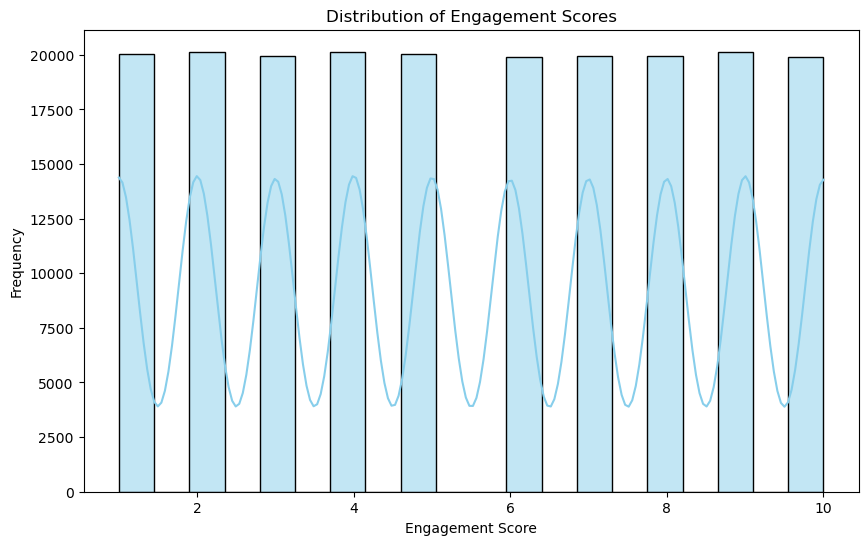

In [11]:
# Engagement Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Engagement_Score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Engagement Scores')
plt.xlabel('Engagement Score')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Top 5 Companies by Conversion Rate
top_companies = df.groupby('Company')['Conversion_Rate'].mean().sort_values(ascending=False).head(5)
print("Top 5 Companies by Average Conversion Rate:")
print(top_companies)


Top 5 Companies by Average Conversion Rate:
Company
Innovate Industries    0.080384
TechCorp               0.080157
Alpha Innovations      0.080084
DataTech Solutions     0.079989
NexGen Systems         0.079736
Name: Conversion_Rate, dtype: float64


In [13]:
# Customer Segment Analysis
segment_analysis = df.groupby('Customer_Segment')[['Clicks', 'Impressions', 'Conversion_Rate']].mean().sort_values(by='Conversion_Rate', ascending=False)
print("Customer Segment Performance:")
print(segment_analysis)

Customer Segment Performance:
                         Clicks  Impressions  Conversion_Rate
Customer_Segment                                             
Foodies              549.163699  5491.820434         0.080257
Outdoor Adventurers  550.562420  5512.205618         0.080180
Tech Enthusiasts     548.827974  5488.910463         0.080168
Health & Wellness    550.389165  5526.911803         0.079945
Fashionistas         549.926123  5516.924840         0.079794
